Importing all essential libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [89]:
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

In [90]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

Loading the dataset

In [91]:
bikedf = pd.read_csv('/content/drive/MyDrive/csv pandas/day.csv')
bikedf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [92]:
bikedf.shape

(730, 16)

In [93]:
bikedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [94]:
# checking duplicate values in bikedf
len(bikedf[bikedf.duplicated()])

0

As 'instant' is just a serial no. we can drop that column.

As the month and year is given in the dataset, we can drop 'dteday' column.

We can also drop 'casual' and 'registered' as 'cnt' is the target variable.

In [95]:
bikedf = bikedf.drop(labels = ['instant', 'dteday', 'casual', 'registered'], axis = 1)

In [96]:
bikedf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [97]:
# understanding the data

bikedf.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


- season: there are total 4 seasons.
- yr: there are 2 months, its either 2018 or 2019.
- mnth: there are 12 months.
- holiday: Max is 1 and min is 0.
- weekday: there are 7 weekdays, from 0 to 6
- workingday: 1 or 0 depending on if it's a working day or a non-working day.
- weathersit: there are 3 weather situations, starting from 1 to 3.
- temp: variance of temperature between 2.4 and 35.3, with median value 20.4
- atemp: variance of feeling temperature between 3.9 and 42.0, with median value 24.3
- hum: humidity ranging from 0 to a max of 97.2, with a median of 62.6
- windspeed: variance of windspeed between 1.5 to 34.0, with a median value 12.12

In [98]:
# making a copy of the main dataframe and working in the copied dataframe, keeping the main dataframe intact
bike_df = bikedf.copy()

In [99]:
bike_df.season = bike_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_df.mnth = bike_df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike_df.weekday = bike_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike_df.weathersit = bike_df.weathersit.map({1: 'Clear to Partly cloudy', 2: 'Misty to Cloudy', 3: 'Light Snow-Rain to Scattered clouds', 4: 'Heavy Rain-Ice Pallets to Fog'})

In [100]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty to Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty to Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear to Partly cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear to Partly cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear to Partly cloudy,9.305237,11.46350,43.6957,12.522300,1600


### Exploratory Data Analysis

Univariate Analysis

In [101]:
# variables with dtype object
object_list = []
for i in bike_df.columns:
  if bike_df[i].dtype == 'O':
    object_list.append(i)
print(object_list)

['season', 'mnth', 'weekday', 'weathersit']


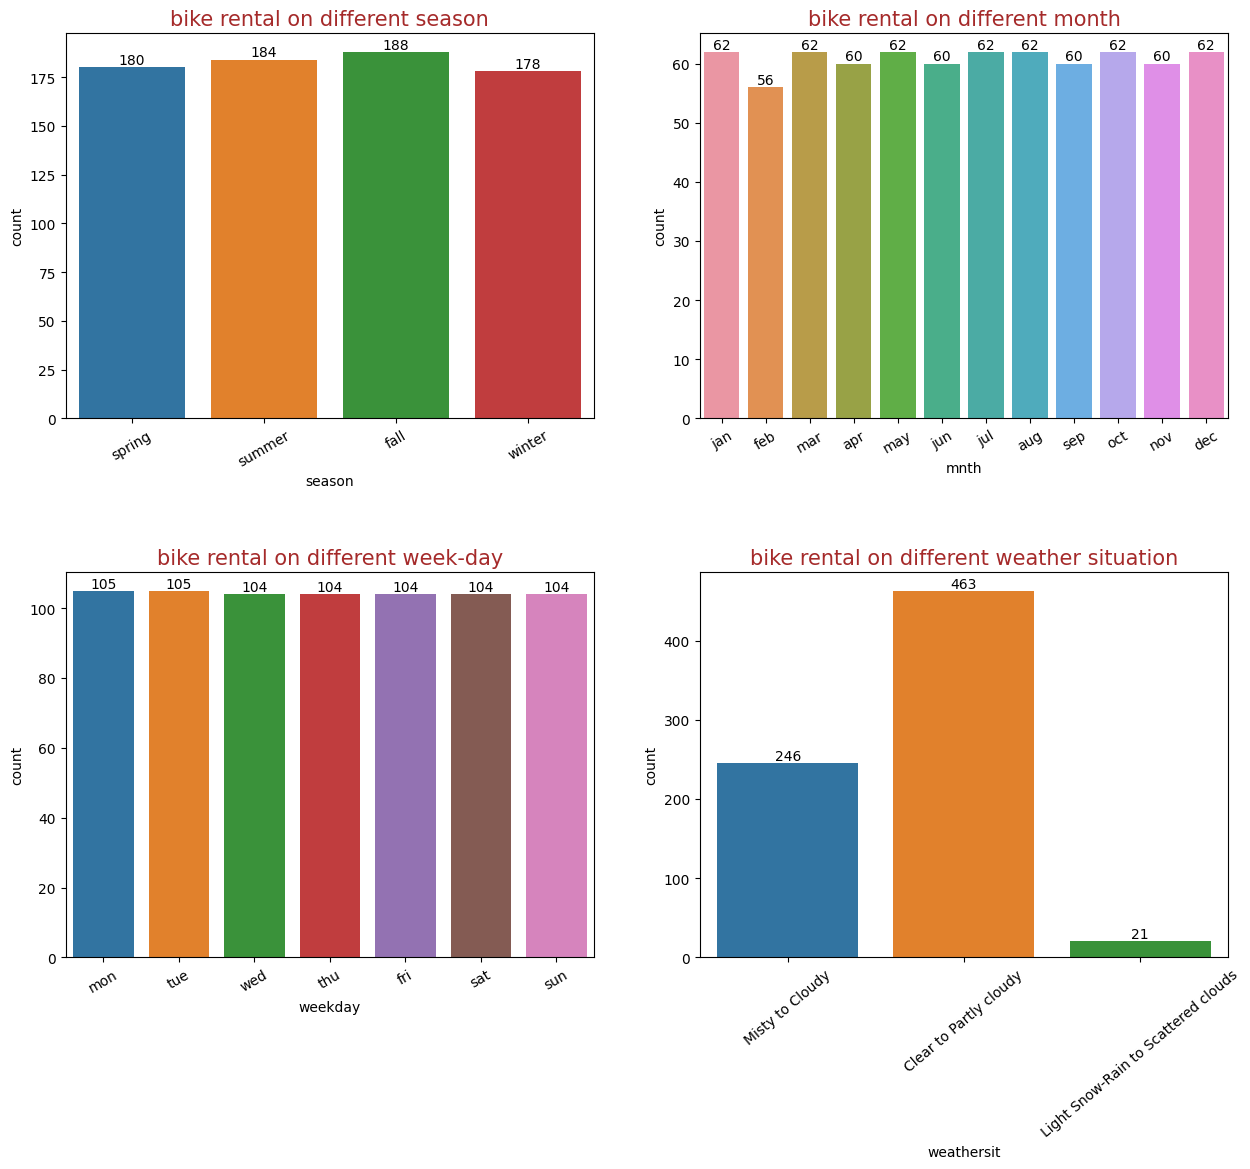

In [102]:
# univariate analysis of categorical columns
plt.figure(figsize = (15,12))
plt.subplot(2,2,1)
plt.title('bike rental on different season', color = 'brown', fontsize = 15)
s = sns.countplot(data = bike_df, x = 'season')
for bars1 in s.containers:
  s.bar_label(bars1)
plt.xticks(rotation = 30)
plt.subplot(2,2,2)
plt.title('bike rental on different month', color = 'brown', fontsize = 15)
m = sns.countplot(data = bike_df, x = 'mnth')
for bars2 in m.containers:
  m.bar_label(bars2)
plt.xticks(rotation = 30)
plt.subplot(2,2,3)
plt.title('bike rental on different week-day', color = 'brown', fontsize = 15)
wd = sns.countplot(data = bike_df, x = 'weekday')
for bars3 in wd.containers:
  wd.bar_label(bars3)
plt.xticks(rotation = 30)
plt.subplot(2,2,4)
plt.title('bike rental on different weather situation', color = 'brown', fontsize = 15)
ws = sns.countplot(data = bike_df, x = 'weathersit')
for bars4 in ws.containers:
  ws.bar_label(bars4)
plt.xticks(rotation = 40)
plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

Observations:

- Maximum bike rentals are seen in fall season, followed by summer and spring. Least bikes are rented in winters. The difference in rantals is thoough minute for the different seasons.
- Least bike rentals is seen in month February, for all other months the rentals are almost similar with slight differences.
- Bike rentals is slightly higher in monday and tuesday making them the days with maximum bike rentals. It is same for every other weekday.
- Bike rentals is maximum in case of clear to partly cloudy days followed by Misty to cloudy days with a huge difference. Rentals are least on days of light snow rain to scattered clouds.

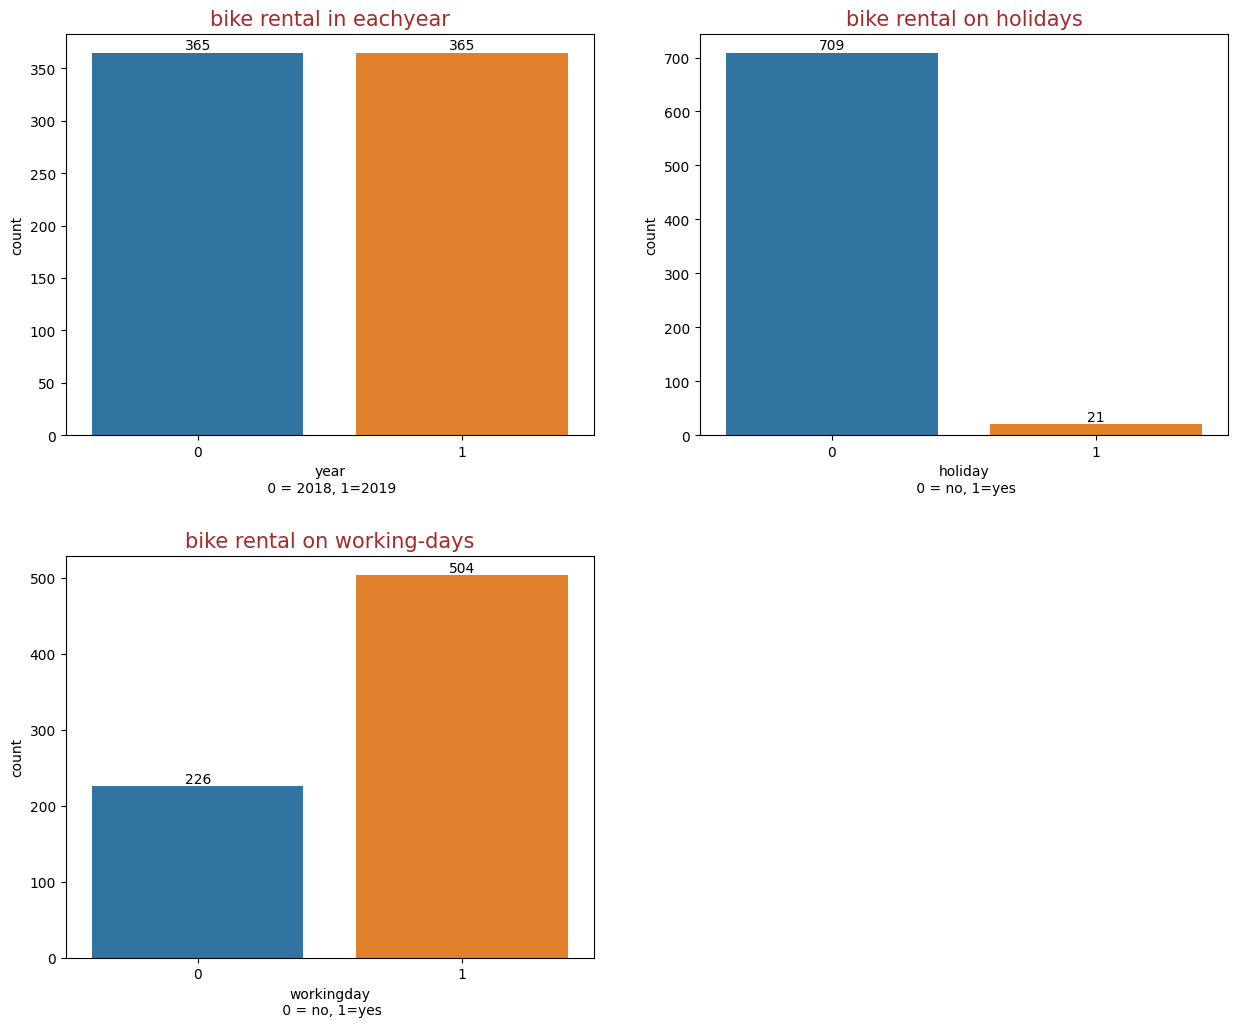

In [103]:
plt.figure(figsize = (15,12))
plt.subplot(2,2,1)
plt.title('bike rental in eachyear', color = 'brown', fontsize = 15)
yr = sns.countplot(data = bike_df, x = 'yr')
for i in yr.containers:
  yr.bar_label(i)
plt.xlabel( 'year\n 0 = 2018, 1=2019')
plt.subplot(2,2,2)
plt.title('bike rental on holidays', color = 'brown', fontsize = 15)
holiday = sns.countplot(data = bike_df, x = 'holiday')
for i in holiday.containers:
  holiday.bar_label(i)
plt.xlabel( 'holiday\n 0 = no, 1=yes')
plt.subplot(2,2,3)
plt.title('bike rental on working-days', color = 'brown', fontsize = 15)
workingday = sns.countplot(data = bike_df, x = 'workingday')
for i in workingday.containers:
  workingday.bar_label(i)
plt.xlabel( 'workingday\n 0 = no, 1=yes')
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

Observations:

- Univariate analysis shows similar rentals in both 2018 and 2019.
- Bike rentals are significantly lesser on holidays whereas it is very high on normal days.
- Bike rentals are significantly higher on working days, compared to non-working days.

Bivariate Analysis

In [104]:
object_list

['season', 'mnth', 'weekday', 'weathersit']

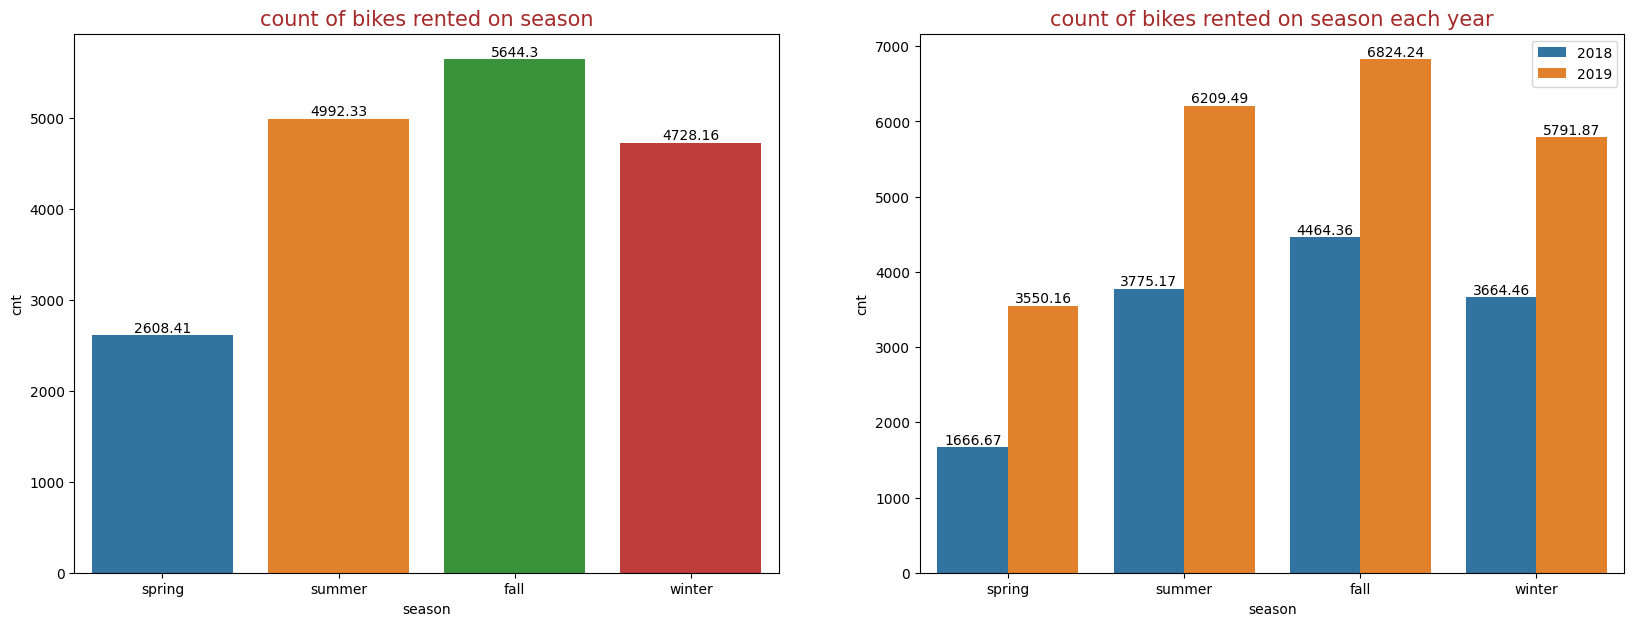

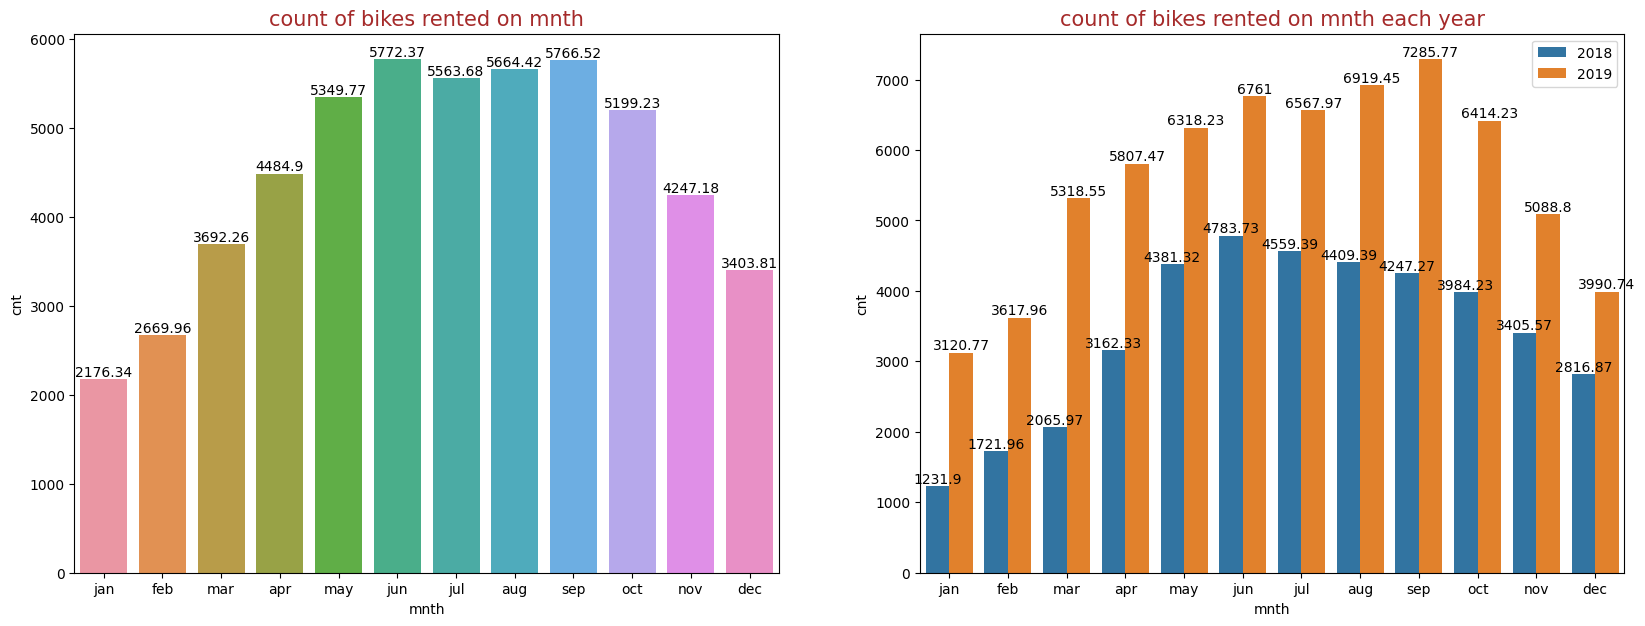

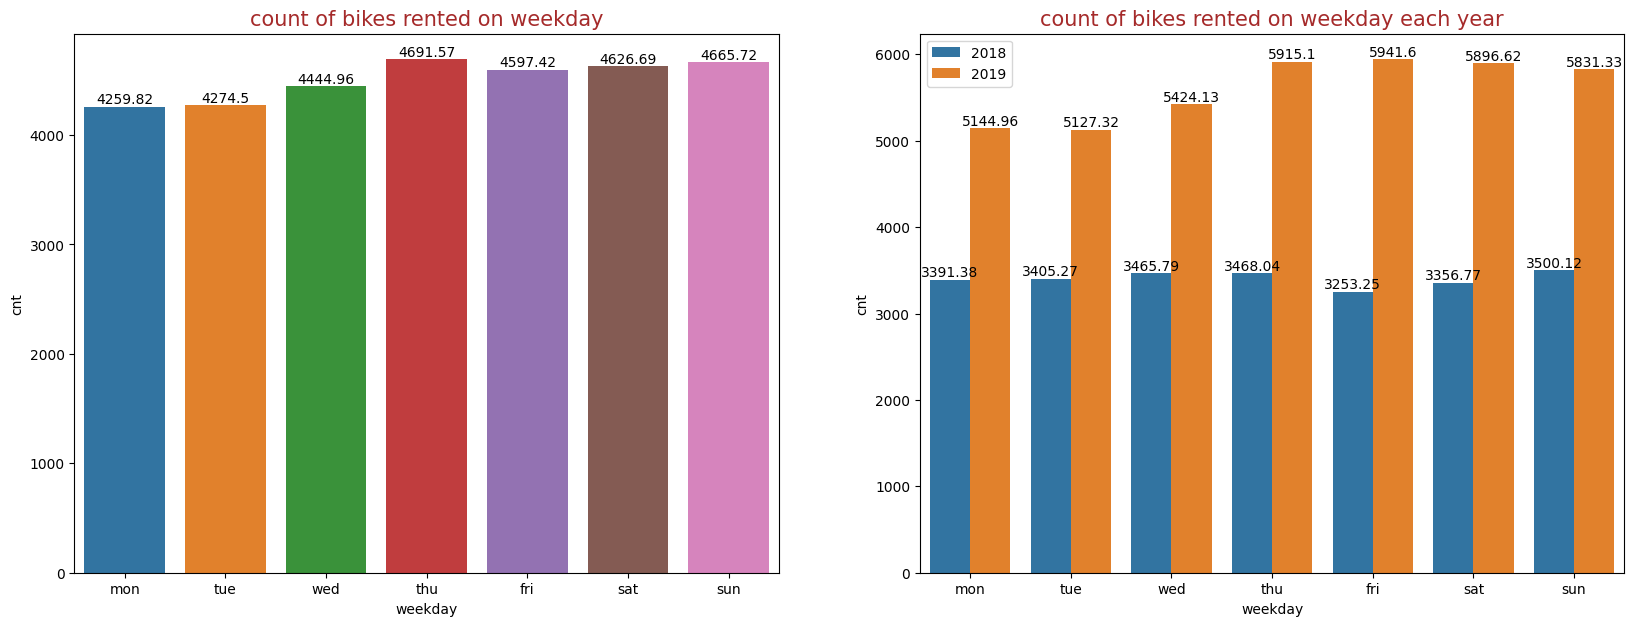

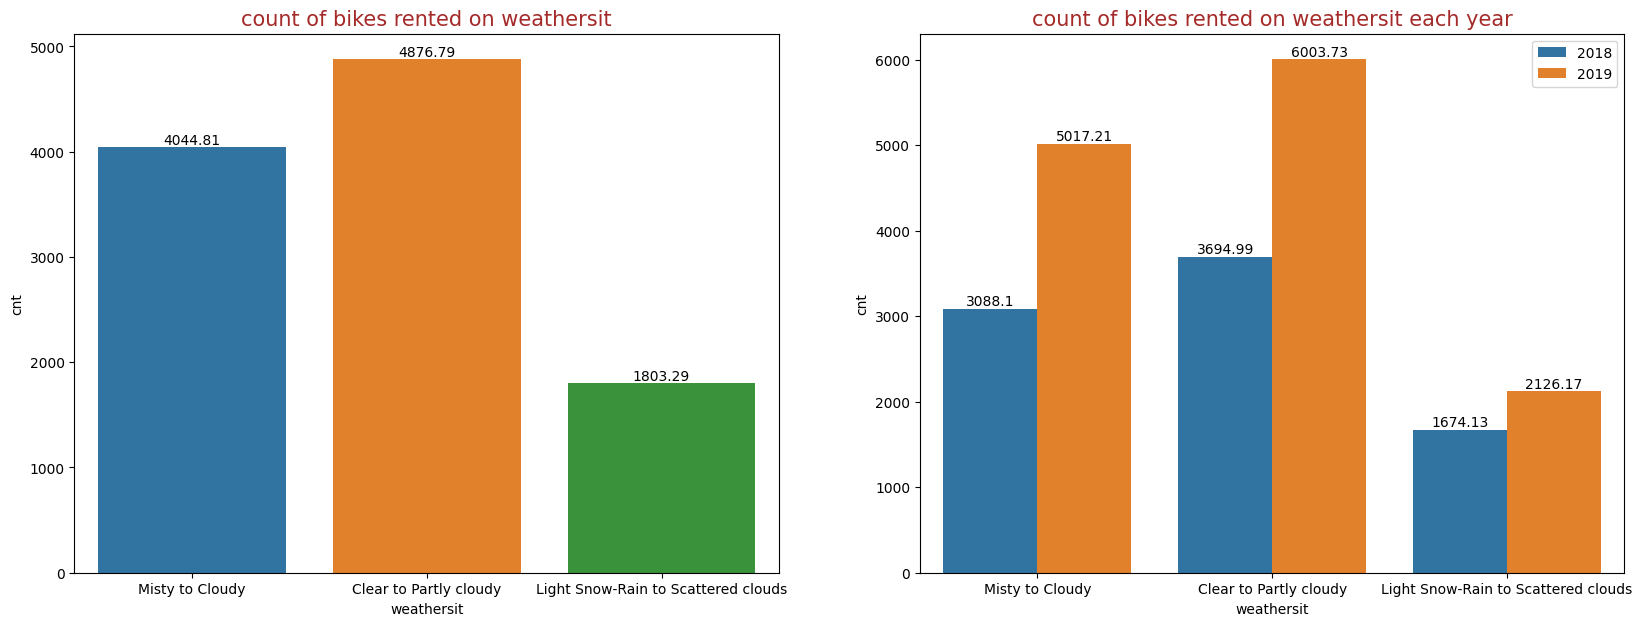

In [105]:
# bivariate analysis of categorical variables with count of bikes rented

for i in object_list:
  plt.figure(figsize=(20,7))
  plt.subplot(1,2,1)
  plt.title(f'count of bikes rented on {i}', color='brown', fontsize = 15)
  a = sns.barplot(data = bike_df, x= i, y='cnt', ci=None)
  for bars_1 in a.containers:
    a.bar_label(bars_1)
  plt.subplot(1,2,2)
  plt.title(f'count of bikes rented on {i} each year', color='brown', fontsize = 15)
  b = sns.barplot(data = bike_df, x= i, hue='yr', y='cnt', ci= None)
  for bars_2 in b.containers:
    b.bar_label(bars_2)
  plt.legend(labels = ['2018', '2019'])
plt.show()

Observations:

- Count of bikes rented is maximum in fall followed by summer and winter, and spring being the season with least rented bikes for both 2018 and 2019.
- In 2019 maximum bikes were rented in September followed by August, whereas in 2018 maximum bikes were rented in June, followed by July. Least bikes were rented in the month of January and February for both 2018 and 2019.
- In 2019, maximum bikes were rented on Fridays and least bikes were rented on Tuesdays. Whereas, in 2018, maximum bikes were rented on Sundays, and least bikes were rented on Fridays.
- For both 2018 and 2019, most bikes were rented on Clear to Partly cloudy days, and least bikes were rented on days of Light snow-rain to Scattered clouds.
- From all these graphs we can undersrtand a huge increase in demand of rented bikes in 2019 from 2018.

In [106]:
# list of categorical variables with count of bikes rented
cat_num_list =['yr', 'holiday', 'workingday']

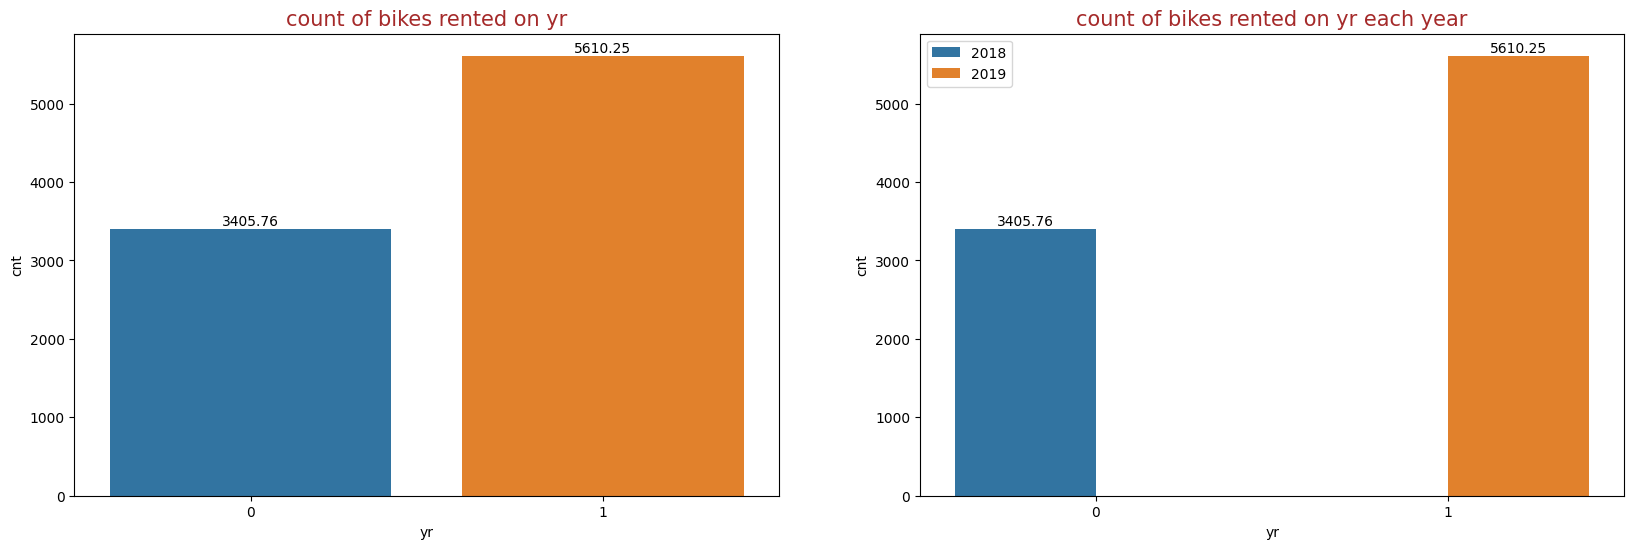

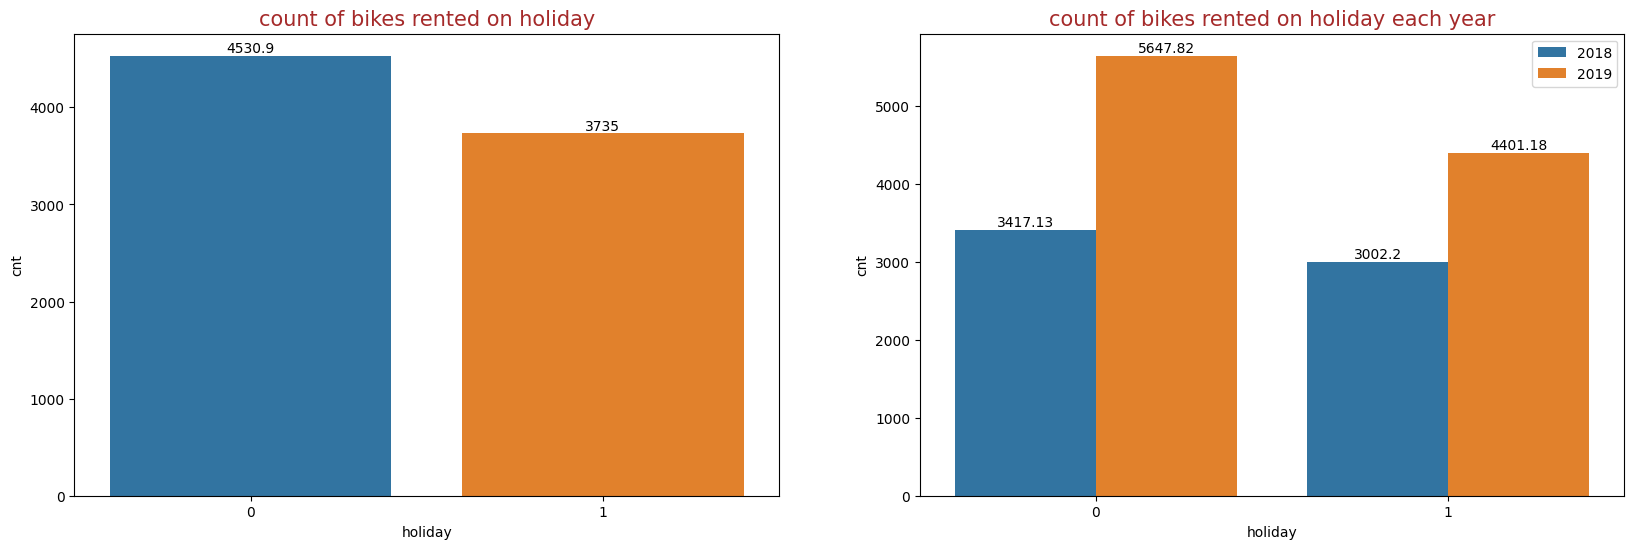

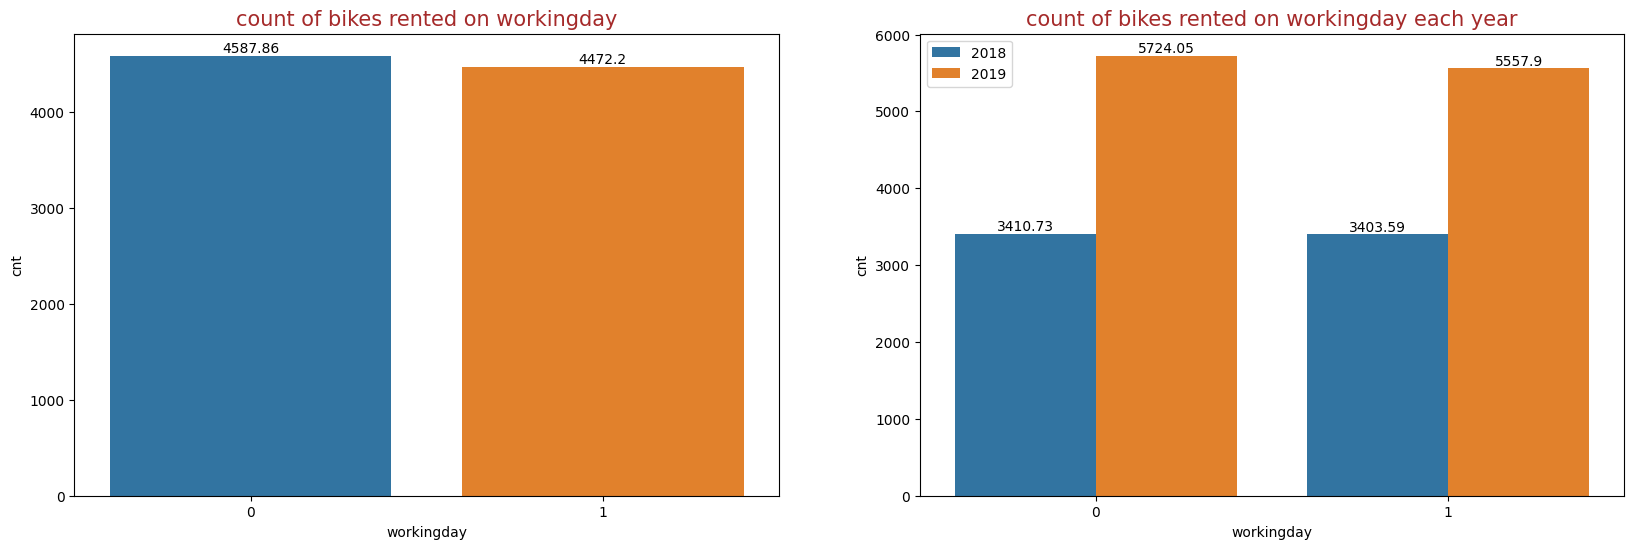

In [107]:
# bivariate analysis of numerical categorical variables with count of bikes rented
for j in cat_num_list:
  plt.figure(figsize = (20,6))
  plt.subplot(1,2,1)
  plt.title(f'count of bikes rented on {j}', color = 'brown', fontsize = 15)
  a = sns.barplot(data = bike_df, x= j, y='cnt', ci=None)
  for bars_1 in a.containers:
    a.bar_label(bars_1)
  plt.subplot(1,2,2)
  plt.title(f'count of bikes rented on {j} each year', color = 'brown', fontsize = 15)
  b = sns.barplot(data = bike_df, x= j, hue= 'yr', y='cnt', ci=None)
  for bars_2 in b.containers:
    b.bar_label(bars_2)
  plt.legend(labels = ['2018','2019'])
plt.show()

Observations:

- Bikes demand increases significantly from 2018 to 2019, with an approximate increase of 2205 more bikes rented in 2019 compared to 2018.
- Less bikes are rented on holidays. The difference of bikes rented on normal days and on holidays is slight in case of 2018, whereas in 2019, significantly less bikes were rented on holidays.
- On non-working days slightly more bikes were rented than working days.  

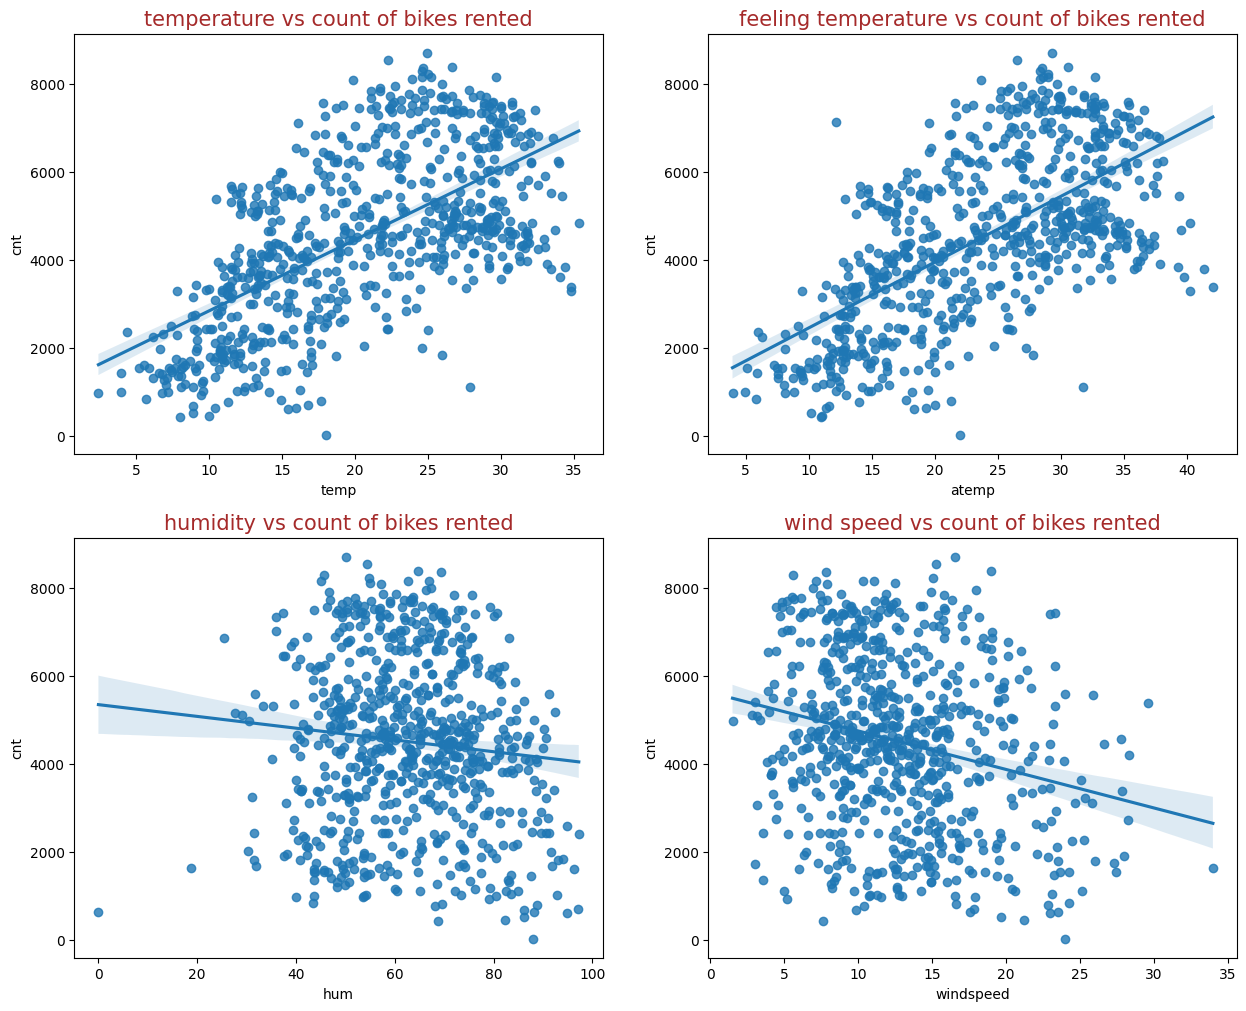

In [108]:
# comparing how count of bikes rented depends on continuous variable

plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
plt.title('temperature vs count of bikes rented', color = 'brown', fontsize = 15)
sns.regplot(data = bike_df, x= 'temp', y= 'cnt')
plt.subplot(2,2,2)
plt.title('feeling temperature vs count of bikes rented', color = 'brown', fontsize = 15)
sns.regplot(data = bike_df, x= 'atemp', y= 'cnt')
plt.subplot(2,2,3)
plt.title('humidity vs count of bikes rented', color = 'brown', fontsize = 15)
sns.regplot(data = bike_df, x= 'hum', y= 'cnt')
plt.subplot(2,2,4)
plt.title('wind speed vs count of bikes rented', color = 'brown', fontsize = 15)
sns.regplot(data = bike_df, x= 'windspeed', y= 'cnt')
plt.show()

Observations:

- 'temp' and 'atemp' shows a postive correlation with counts of bikes rented, meaning, with the increase in temperature and feeling temperatures, more people were out, renting more bikes.
- 'hum' and 'windspeed' are negatively correlated with counts of bikes rented, meaning, with the increase in humidity and windpeed, less people were renting bikes.

Checking the correlation between the continuous variables

In [109]:
cont_vars = ['temp', 'atemp', 'hum', 'windspeed']

<Axes: >

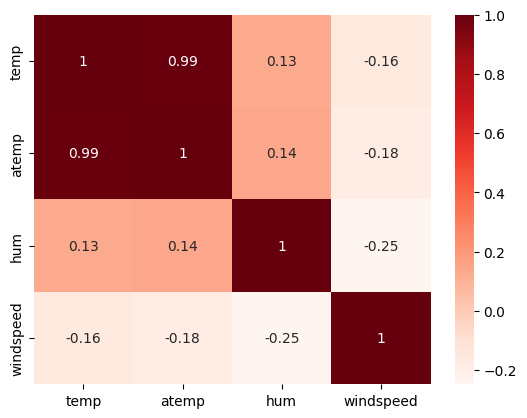

In [110]:
sns.heatmap(bike_df[cont_vars].corr(), annot=True, cmap= 'Reds')

Observation:

High correlation between 'temp' and 'atemp' variables.

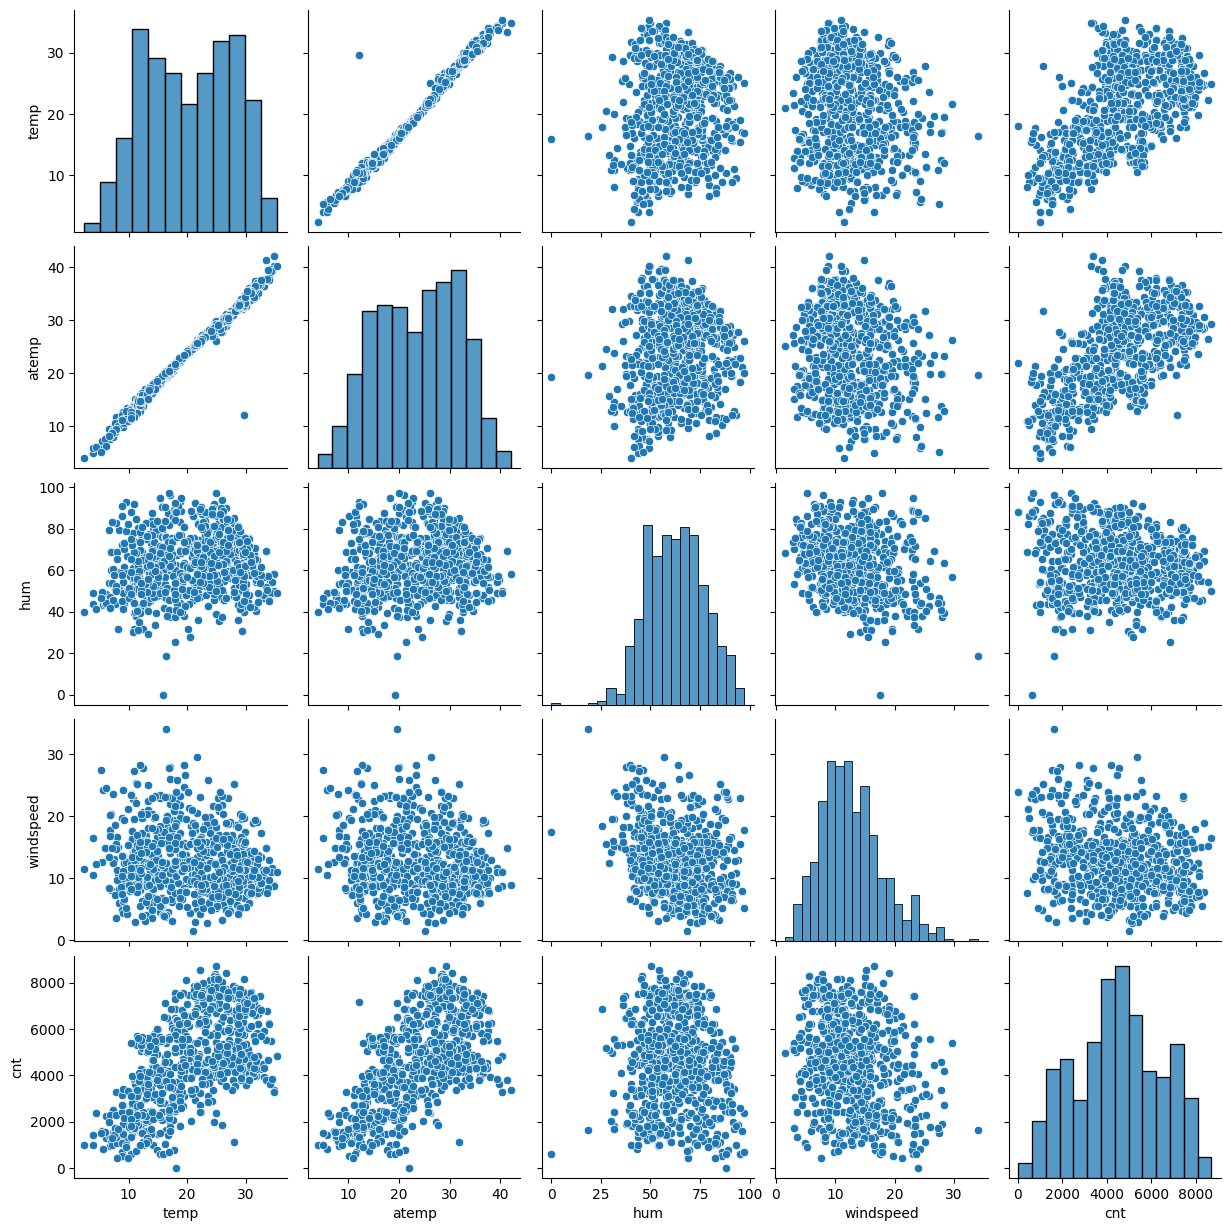

In [111]:
sns.pairplot(data = bike_df, vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt'])
plt.show()

### Preparing data before model building

In [112]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty to Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty to Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear to Partly cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear to Partly cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear to Partly cloudy,9.305237,11.46350,43.6957,12.522300,1600


Getting dummies for categorical variables

In [113]:
season_dum = pd.get_dummies(bike_df['season'], drop_first = True)

In [114]:
season_dum.head()

# 0 0 0 fall
# 1 0 0 spring
# 0 1 0 summer
# 0 0 1 winter

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [115]:
month_dum = pd.get_dummies(bike_df.mnth, drop_first =True)

In [116]:
month_dum.head()
# all 0 is apr
# for all other months is denoted by 1

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [117]:
weekday_dum = pd.get_dummies(bike_df.weekday, drop_first = True)

In [118]:
weekday_dum.head()

# all 0 is fri
# for all other days is denoted by 1

,mon,sat,sun,thu,tue,wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [119]:
weathersit_dum = pd.get_dummies(bike_df.weathersit, drop_first = True)

In [120]:
weathersit_dum.head()
# 0 0 Clear to Partly cloudy
# 0 1 Misty to Cloudy
# 1 0 Light Snow-Rain to Scattered clouds

,Light Snow-Rain to Scattered clouds,Misty to Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


Now, we can contenate the dummy variables with the main dataframe.

Then we can drop the respective variables.

In [121]:
bike_df = pd.concat([bike_df,season_dum,month_dum,weekday_dum,weathersit_dum], axis = 1).drop(labels = ['season','mnth','weekday','weathersit'], axis=1)

In [122]:
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Snow-Rain to Scattered clouds,Misty to Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
print(bike_df.shape) # checking the shape of the new dataframe
print(bike_df.columns) # checking the columns of the new dataframe

(730, 30)
Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul',
       'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu',
       'tue', 'wed', 'Light Snow-Rain to Scattered clouds', 'Misty to Cloudy'],
      dtype='object')


In [124]:
# checking info of the new dataframe
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   yr                                   730 non-null    int64  
 1   holiday                              730 non-null    int64  
 2   workingday                           730 non-null    int64  
 3   temp                                 730 non-null    float64
 4   atemp                                730 non-null    float64
 5   hum                                  730 non-null    float64
 6   windspeed                            730 non-null    float64
 7   cnt                                  730 non-null    int64  
 8   spring                               730 non-null    uint8  
 9   summer                               730 non-null    uint8  
 10  winter                               730 non-null    uint8  
 11  aug                             

Train Test Split of the dataframe

In [125]:
bike_train, bike_test = train_test_split(bike_df, train_size = 0.7, random_state = 100)

In [126]:
print(f'shape of train set: {bike_train.shape}')
print(f'shape of test set:  {bike_test.shape}')

shape of train set: (510, 30)
shape of test set:  (220, 30)


Scaling selected variables from train set

In [127]:
# list of columns to be min_max scaled
to_be_scaled = ['temp','atemp','hum','windspeed','cnt']

In [128]:
scaler = MinMaxScaler()
bike_train[to_be_scaled] = scaler.fit_transform(bike_train[to_be_scaled])

In [129]:
X_train = bike_train.drop('cnt', axis=1)
y_train = bike_train['cnt']

In [130]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

Using RFE to automatically select features for model building

In [131]:
rfe = RFE(lm, n_features_to_select= 15)
rfe = rfe.fit(X_train, y_train)

In [132]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 12),
 ('mar', False, 15),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 14),
 ('tue', False, 7),
 ('wed', False, 11),
 ('Light Snow-Rain to Scattered clouds', True, 1),
 ('Misty to Cloudy', True, 1)]

In [133]:
cols = X_train.columns[rfe.support_]

Building a model using the RFE suggested columns

In [134]:
# X_train with all rfe features
X_train1 = X_train[cols]
X_train_sm1 = sm.add_constant(X_train1)
lm = sm.OLS(y_train, X_train_sm1)
model_1 = lm.fit()

In [135]:
model_1.params

const                                  0.319667
yr                                     0.230404
holiday                               -0.091089
temp                                   0.481503
hum                                   -0.162213
windspeed                             -0.188726
spring                                -0.061255
summer                                 0.042337
winter                                 0.101921
dec                                   -0.035461
jan                                   -0.043411
jul                                   -0.055250
nov                                   -0.038701
sep                                    0.075467
Light Snow-Rain to Scattered clouds   -0.246481
Misty to Cloudy                       -0.054300
dtype: float64

In [136]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          8.15e-189
Time:                        13:28:42   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [137]:
# defining a funtion to calculate the vif of dataset

def cal_vif(df):
  vif = pd.DataFrame()
  vif['features'] = df.columns
  vif['vif_value'] = [variance_inflation_factor(df.values, i) for i  in range(df.shape[1])]
  vif = vif.sort_values(by = 'vif_value', ascending = False)
  return vif

In [138]:
# calculating vif for X_train
cal_vif(X_train1)

,features,vif_value
3,hum,30.888567
2,temp,17.794483
4,windspeed,4.722587
5,spring,4.368260
7,winter,4.063467
6,summer,2.817115
14,Misty to Cloudy,2.320887
0,yr,2.088836
11,nov,1.845259
9,jan,1.746001


Removing hum because of high vif value

In [139]:
X_train2 = X_train1.drop('hum', axis=1)
X_train_sm2 = sm.add_constant(X_train2)
lm = sm.OLS(y_train, X_train_sm2)
model_2 = lm.fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          4.75e-186
Time:                        13:28:42   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [140]:
cal_vif(X_train2)

,features,vif_value
2,temp,5.169445
3,windspeed,4.668634
6,winter,2.948000
4,spring,2.888156
5,summer,2.241121
0,yr,2.073826
10,nov,1.812313
8,jan,1.656151
9,jul,1.593675
13,Misty to Cloudy,1.565601


The vif of 'temp' is high, lets see what difference it makes when we remove this variable.

In [141]:
X_train3 = X_train2.drop('temp', axis = 1)
X_train_sm3 = sm.add_constant(X_train3)
model_3 = sm.OLS(y_train, X_train_sm3).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     144.9
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          1.82e-159
Time:                        13:28:42   Log-Likelihood:                 438.84
No. Observations:                 510   AIC:                            -849.7
Df Residuals:                     496   BIC:                            -790.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [142]:
cal_vif(X_train3)

,features,vif_value
2,windspeed,3.885916
3,spring,2.887892
5,winter,2.847747
4,summer,2.024095
0,yr,1.834394
9,nov,1.802049
7,jan,1.640445
12,Misty to Cloudy,1.525006
6,dec,1.460189
8,jul,1.195677


- By removing 'temp' variable, the R-squared for the model decreased heavily to 0.79.
- Instead of removing 'temp', lets remove some other insignificant feature and check how much the R-squared and the vif changes.

In [143]:
# instead of dropping 'temp', dropping 'summer'
X_train4 = X_train2.drop('summer', axis = 1)
X_train_sm4 = sm.add_constant(X_train4)
model_4 = sm.OLS(y_train, X_train_sm4).fit()
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.6
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          4.08e-186
Time:                        13:28:42   Log-Likelihood:                 502.26
No. Observations:                 510   AIC:                            -976.5
Df Residuals:                     496   BIC:                            -917.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

When we remove 'summer' instead of 'temp', the R-squared value is much more than the previous model, which is 0.83.

In [144]:
cal_vif(X_train4)

,features,vif_value
2,temp,4.668846
3,windspeed,4.047688
5,winter,2.553356
4,spring,2.361359
0,yr,2.063751
9,nov,1.811602
7,jan,1.647884
12,Misty to Cloudy,1.535353
6,dec,1.464721
8,jul,1.357969


'nov' has a high p value of 0.014, so lets remove 'nov' from the list of features.

In [145]:
X_train5 = X_train4.drop('nov', axis = 1)
X_train_sm5 = sm.add_constant(X_train5)
model_5 = sm.OLS(y_train, X_train_sm5).fit()
print(model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.3
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          5.72e-186
Time:                        13:28:42   Log-Likelihood:                 499.12
No. Observations:                 510   AIC:                            -972.2
Df Residuals:                     497   BIC:                            -917.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [146]:
cal_vif(X_train5)

,features,vif_value
2,temp,4.634565
3,windspeed,4.006180
4,spring,2.359520
0,yr,2.062972
7,jan,1.642457
5,winter,1.635342
11,Misty to Cloudy,1.535265
8,jul,1.356993
6,dec,1.288282
9,sep,1.203308


'dec' has a high p value of 0.043, so lets remove 'dec' from the list of features.

In [147]:
X_train6 = X_train5.drop('dec', axis = 1)
X_train_sm6 = sm.add_constant(X_train6)
model_6 = sm.OLS(y_train, X_train_sm6).fit()
print(model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.7
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          2.87e-186
Time:                        13:28:42   Log-Likelihood:                 497.01
No. Observations:                 510   AIC:                            -970.0
Df Residuals:                     498   BIC:                            -919.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [148]:
cal_vif(X_train6)

,features,vif_value
2,temp,4.630725
3,windspeed,4.005328
4,spring,2.243997
0,yr,2.062660
6,jan,1.601519
10,Misty to Cloudy,1.532964
5,winter,1.390892
7,jul,1.356311
8,sep,1.201523
9,Light Snow-Rain to Scattered clouds,1.081528


'jan' has a high p value of 0.017, so lets remove 'jan' from the list of features.

In [149]:
X_train7 = X_train6.drop('jan', axis = 1)
X_train_sm7 = sm.add_constant(X_train7)
model_7 = sm.OLS(y_train, X_train_sm7).fit()
print(model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.5
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          3.10e-186
Time:                        13:28:42   Log-Likelihood:                 494.07
No. Observations:                 510   AIC:                            -966.1
Df Residuals:                     499   BIC:                            -919.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [150]:
cal_vif(X_train7)

,features,vif_value
2,temp,4.607119
3,windspeed,3.999588
0,yr,2.055830
4,spring,1.643960
9,Misty to Cloudy,1.518313
5,winter,1.390448
6,jul,1.353506
7,sep,1.201007
8,Light Snow-Rain to Scattered clouds,1.081338
1,holiday,1.042830


In this model_7 all the p-values and the vif are significant.

In [151]:
y_train_pred = model_7.predict(X_train_sm7)
y_train_pred

576    0.744170
426    0.458802
728    0.392825
482    0.559400
111    0.275880
         ...   
578    0.849875
53     0.216444
350    0.269779
79     0.307660
520    0.627534
Length: 510, dtype: float64

### Residual Analysis

In [152]:
residuals = y_train - y_train_pred

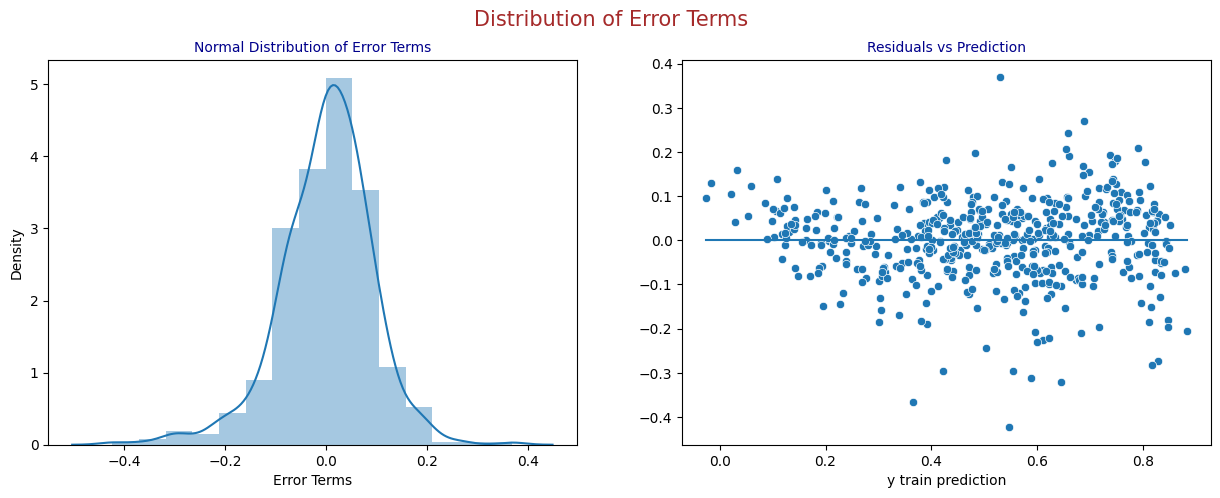

In [153]:
plt.figure(figsize = (15,5))

plt.suptitle('Distribution of Error Terms', fontsize = 15, color = 'brown')

plt.subplot(1,2,1)
plt.title("Normal Distribution of Error Terms", fontsize = 10, color = 'darkblue')
sns.distplot(residuals, bins = 15)
plt.xlabel('Error Terms')

plt.subplot(1,2,2)
plt.title("Residuals vs Prediction", fontsize = 10, color = 'darkblue')
sns.scatterplot(y = residuals, x = y_train_pred)
sns.lineplot(y = residuals.mean(), x = y_train_pred, palette = 'darkblue')
plt.xlabel('y train prediction')

plt.show()

In the above two graphs:
- when residuals are visualized in a distribution plot, we can see the error terms are normally distributed, with mean very close to 0.
- when the the residuals are plotted against the predictions, we can see that the mean is 0.

### Testing for Homoscedasticity

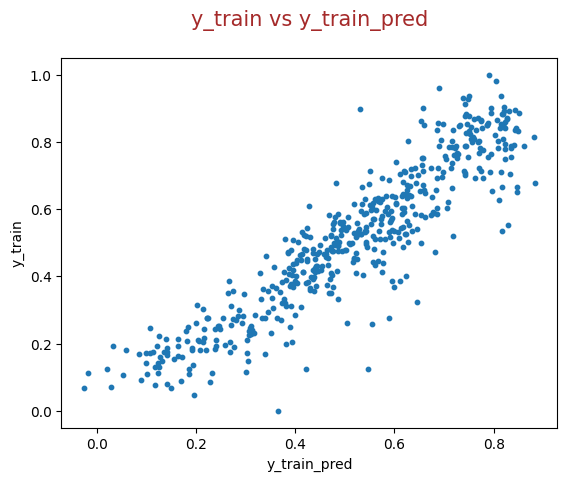

In [154]:
plt.title('y_train vs y_train_pred\n', fontsize = 15, color = 'brown')
plt.scatter(x = y_train_pred, y = y_train, s = 10)
plt.xlabel('y_train_pred')
plt.ylabel('y_train')
plt.show()

The plot between y_train and y_train_pred shows an almost constant variance of predictions, and thus the errors validating **Homoscedasticity**.

### Testing correlation between error terms

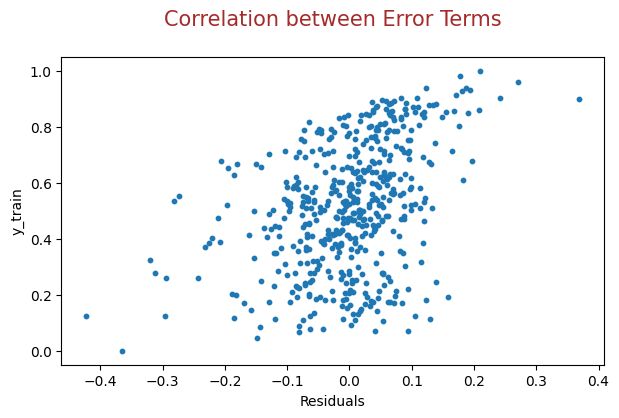

In [155]:
plt.figure(figsize=(7,4))
plt.title('Correlation between Error Terms\n', fontsize = 15, color = 'brown')
plt.scatter(x = residuals, y = y_train, s = 10)
plt.xlabel('Residuals')
plt.ylabel('y_train')
plt.show()

From the above scatter plot we can conclude that there is no correlation between the error terms.

So, as we have tested all our assumptions for the linear regression model, now lets proceed to prediction of test data values.

### Making Predictions

In [156]:
# variables in test set that needs to be min max scaled
to_scale_vars = ['temp',	'atemp',	'hum',	'windspeed',	'cnt']

In [157]:
# scaling respective variables of test set
bike_test[to_scale_vars] = scaler.transform(bike_test[to_scale_vars])

In [158]:
# chacking the dataset
bike_test.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Snow-Rain to Scattered clouds,Misty to Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1


Lets prepare the X_test and the y_test for the test dataset

In [159]:
X_test = bike_test[X_train7.columns]
y_test = bike_test.cnt

In [160]:
print(X_test.shape)
print(y_test.shape)

(220, 10)
(220,)


In [161]:
X_test_sm = sm.add_constant(X_test)

In [162]:
# predicting the y test values using model_7 based on the train set
y_test_pred = model_7.predict(X_test_sm)
y_test_pred

184    0.364913
535    0.871350
299    0.402027
221    0.602305
152    0.545747
         ...   
702    0.726279
127    0.506405
640    0.780712
72     0.261599
653    0.719648
Length: 220, dtype: float64

### Evaluating the Predictions

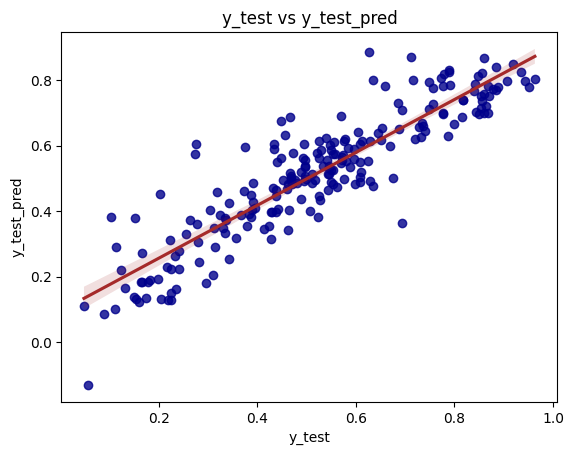

In [163]:
plt.title('y_test vs y_test_pred')
sns.regplot(x = y_test, y = y_test_pred, scatter_kws = {'color':'darkblue'}, line_kws = {'color':'brown'})
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

The y test values and the predicted y test values shows a strong semblance, and hence we can say it is a healthy fit.

### Testing the model quality

In [164]:
# calculating the r2 score of train and test set

r2score_train = r2_score(y_train, y_train_pred)
r2score_test = r2_score(y_test, y_test_pred)

In [166]:
print(f'r2 score for test data set : {round(r2score_test,5)}')
print(f'r2 score for train data set : {round(r2score_train,5)}')
print(f'Difference between r2 score for test and train data set : {round(abs(r2score_test - r2score_train),5)}')

r2 score for test data set : 0.80749
r2 score for train data set : 0.8322
Difference between r2 score for test and train data set : 0.02472


As the difference between r2 score for the test data and the trained data is 0.02, and significantly less than 5%, this model 'model_7' can be generalized.

In [167]:
parameters_model_7 = pd.DataFrame(model_7.params)
parameters_model_7

,0
const,0.253133
yr,0.234244
holiday,-0.098014
temp,0.449789
windspeed,-0.139510
spring,-0.112286
winter,0.044893
jul,-0.072935
sep,0.057311
Light Snow-Rain to Scattered clouds,-0.285463


**So the best fitted line is:**


0.253133 + yr x 0.234244 - holiday x 0.098014 + temp x 0.449789 - windspeed x 0.139510 - spring x 0.112286 + winter x 0.044893 - jul x 0.072935 + sep x 0.057311 - Light Snow-Rain to Scattered clouds x 0.285463 - Misty to Cloudy x 0.079650

- Coefficients of 'yr', 'temp', 'winter', 'sep' are positive.
- Coefficients of 'holiday', 'windspeed', 'spring', 'july', 'Light Snow-Rain to Scattered clouds', 'Misty to Cloudy' are negative.
- Constant is 0.253133.

### Model Conclusions


The features on which bike rentals depend are: year, holiday, temperature, windspeed, seasons like - spring, winter, july, september, and weather situations like - Light Snow-Rain to Scattered clouds & Misty to Cloudy.